In [1]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Dropout

In [2]:
(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

In [3]:
print(f'Total train input {Xtrain.shape}, total train output {ytrain.shape}')
print(f'Total train input {Xtest.shape}, total train output {ytest.shape}')

Total train input (60000, 28, 28), total train output (60000,)
Total train input (10000, 28, 28), total train output (10000,)


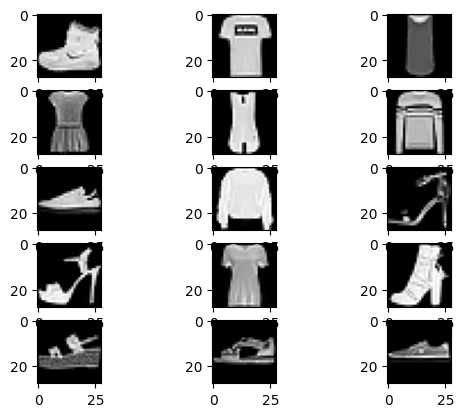

In [4]:
for i in range(15):
    # define subplot
    plt.subplot(5, 3, 1+i)
    # plot raw pixel data
    plt.imshow(Xtrain[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [5]:
#one hot coding
etrainy = tf.keras.utils.to_categorical(ytrain)
etesty = tf.keras.utils.to_categorical(ytest)

In [6]:
#normalize data
Xtrain = Xtrain.reshape((Xtrain.shape[0], 28, 28, 1)).astype('float32')/255
Xtest = Xtest.reshape((Xtest.shape[0], 28, 28, 1)).astype('float32')/255

In [7]:
def init_model():
    model = tf.keras.Sequential()
    model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(28, 28, 1))) #(24, 24, 32)
    model.add(MaxPooling2D((2,2), padding = 'valid')) # (12, 12, 32)
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (5,5), activation = 'relu')) #(8, 8, 128)
    model.add(MaxPooling2D((2,2), padding = 'valid')) #(4, 4, 128)
    model.add(Dropout(0.5))
    model.add(Flatten()) #(2048)
    model.add(Dense(512, activation ='relu'))
    model.add(Dense(10, activation = 'softmax'))
    optimize = Adam(learning_rate=0.001)
    model.compile(optimizer = optimize, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model
    

In [8]:
%load_ext tensorboard

In [9]:
sdir = "ques1"

In [10]:
X_train, X_val, y_train, y_val = train_test_split(Xtrain, etrainy, test_size=0.3, random_state=42)
model = init_model()
callbacks = tf.keras.callbacks.TensorBoard(log_dir = sdir)
detail = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1, 
                   callbacks=[callbacks])
score = model.evaluate(Xtest, etesty, verbose=0)[1]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         102528    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 128)         0

In [1]:
!tensorboard dev list

https://tensorboard.dev/experiment/JnTXbrpjQDanI3ygmwbTxQ/
	Name                 Q3
	Description          Q3
	Id                   JnTXbrpjQDanI3ygmwbTxQ
	Created              2022-11-28 09:29:49 (2 hours ago)
	Updated              2022-11-28 09:29:51 (2 hours ago)
	Runs                 2
	Tags                 5
	Scalars              600
	Tensor bytes         0
	Binary object bytes  56148
https://tensorboard.dev/experiment/EzDmlPoCRHeOwOLlP7dQng/
	Name                 Q1
	Description          Q1
	Id                   EzDmlPoCRHeOwOLlP7dQng
	Created              2022-11-27 22:07:54 (14 hours ago)
	Updated              2022-11-27 22:07:55 (14 hours ago)
	Runs                 2
	Tags                 5
	Scalars              120
	Tensor bytes         0
	Binary object bytes  52459


Total: 2 experiment(s)
